<img src="amazon.png">

# Problem Statement 

Everyday a million products are being recommended to users based on popularity and other metrics on e-commerce 
websites. The most popular e-commerce website boosts average order value by 50%, increases revenues by 300%, 
and improves conversion. In addition to being a powerful tool for increasing revenues, product recommendations 
are so essential that customers now expect to see similar features on all other e-commerce sites. Amazon is 
referred to as "one of the most influential economic and cultural forces in the world", as well as the world's most valuable 
brand. Our objective is to make a recommendation system that recommends new products based on user’s habits.

# Data Definition

**ID :**
Product ID.
    
**Brand :**
Name of the Brand to which the product belongs.
    
**Categories :**
Category of the product.
    
**dateAdded :**
Date on which the product was added.
    
**dateUpdated :**
Date on which the product was updated.
    
**Manufacturer :**
Name of the manufacturer of the product.
    
**Manufacturer Number :**
Number given to the product by the manufacturer.
    
**Name :**
Name of the product.
    
**reviews.numHelpful :**
Number of helpful reviews for the product.
    
**reviews.rating :**
Rating for the product on each review.
    
**reviews.text :**
Informative Review on the product.
    
**reviews.title :**
Title for each review on the product.
    
**reviews.username :**
Username of person posting the review.

# Table of Contents

1. **[Import The Required Libraries](#import_lib)** 
2. **[Set Options](#set)** 
3. **[Read The Data](#RD)** 
4. **[Exploratory Data Analysis](#eda)**
    - 4.1 - [Preparing the Dataset](#dp)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Drop Duplicates](#DD)
        - 4.1.4 - [Missing Values](#Missing_Values)
5. **[Checking Outliers](#outliers)**
    - 5.1 - [Encoding](#Enc)
6. **[Clustering](#C)**
    - 6.1 - [K-Means Clustering](#KMC)
    - 6.2 - [Heirarchical Clustering](#HC)
        - 6.2.1 - [Silhouette Score Method](#SSC)
        - 6.2.2 - [Cluster Analysis - 1](#CA1)
        - 6.2.3 - [Cluster Analysis - 2](#CA2)
    - 6.3 - [DBSCAN](#DBSCAN)
7. **[Building Recommendation Systems](#BRS)**
    - 7.1 - [Popularity Based Recommendation System](#PB)
    - 7.2 - [Content Based Recommendation System](#CB)
    - 7.3 - [Collaborative Filtering](#CF) 
    - 7.4 - [Hybrid Recommendation System](#HR)    

<a id='import_lib'></a>
## 1. Import The Required Libraries

In [7]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet

from sklearn.neighbors import NearestNeighbors

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise import KNNWithMeans,SVDpp
from surprise import accuracy

%run -i viz_silhouette.py # visualizing silhouette score and cluster

<a id='set'></a>
## 2. Set Options

In [15]:
# display all columns of the dataframe
pd.options.display.max_columns = None
# display all rows of the dataframe
pd.options.display.max_rows = None
# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

<a id='RD'></a>
## 3. Read the data

In [16]:
data = pd.read_excel('electronicreviews.xlsx')
data.head()

,id,brand,categories,colors,dateAdded,dateUpdated,manufacturer,manufacturerNumber,name,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,2.000000,5.000000,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1
1,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,5.000000,4.000000,It's thin and light. I can type pretty easily ...,Nice,Appa
2,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,3.000000,4.000000,I love the new design the keys are spaced well...,New,Kman
3,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,6.000000,5.000000,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY
4,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,7.000000,5.000000,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster


<a id='eda'></a>
## 4. Exploratory Data Analysis

<a id='dp'></a>
### 4.1 Data Preparation

<a id='Data_Shape'></a>
#### 4.1.1 Data Dimension

In [3]:
data.shape

(7298, 14)

**Interpretation:** The data has 7298 observations and 14 variables.

#### 4.1.2 Data Types <a id='Data_Types'></a>

In [4]:
data.dtypes

id                     object
brand                  object
categories             object
colors                 object
dateAdded              object
dateUpdated            object
manufacturer           object
manufacturerNumber     object
name                   object
reviews.numHelpful    float64
reviews.rating        float64
reviews.text           object
reviews.title          object
reviews.username       object
dtype: object

**Interpretation:** All the variables are object type except reviews_numHelpful and reviews_rating.

#### 4.1.3 Dropping Duplicates <a id='DD'></a>

In [ ]:
data.drop_duplicates()

#### Remove Insignificant Variables

There are few columns  which is redundant for further analysis Thus, we drop the column.

In [6]:
data.drop(['dateAdded','manufacturer','colors','dateUpdated','manufacturerNumber'], axis=1, inplace=True)

#### 4.1.4 Missing Value Treatments <a id='Missing_Values'></a>

In [20]:
missing_values = pd.DataFrame({
    'value':data.isnull().sum(),
    'percentage': data.isnull().sum()*100/data.shape[0]
})

missing_values.sort_values(by='percentage', ascending=False)

,value,percentage
manufacturer,2667,36.544259
colors,2019,27.665114
reviews.numHelpful,1486,20.361743
reviews.rating,164,2.247191
reviews.text,5,0.068512
reviews.title,4,0.054810
id,0,0.000000
brand,0,0.000000
categories,0,0.000000
dateAdded,0,0.000000


#### Visualize Missing Values using Heatmap

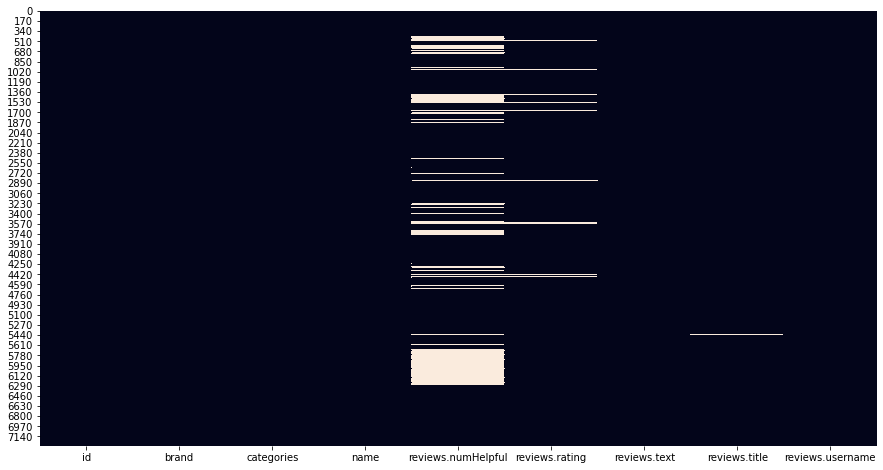

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

#### Handling missing values

In [9]:
data['reviews.numHelpful']=data['reviews.numHelpful'].fillna(0)

In [10]:
data['reviews.rating'] = data['reviews.rating'].fillna(data.groupby('brand')['reviews.rating'].transform('mean'))

In [11]:
data.dropna(inplace=True)


In [12]:
missing_values = pd.DataFrame({
    'value':data.isnull().sum(),
    'percentage': data.isnull().sum()*100/data.shape[0]
})

missing_values.sort_values(by='percentage', ascending=False)

,value,percentage
id,0,0.000000
brand,0,0.000000
categories,0,0.000000
name,0,0.000000
reviews.numHelpful,0,0.000000
reviews.rating,0,0.000000
reviews.text,0,0.000000
reviews.title,0,0.000000
reviews.username,0,0.000000


In [13]:
data.shape

(7289, 9)

#### Revisualize Missing Values using Heatmap

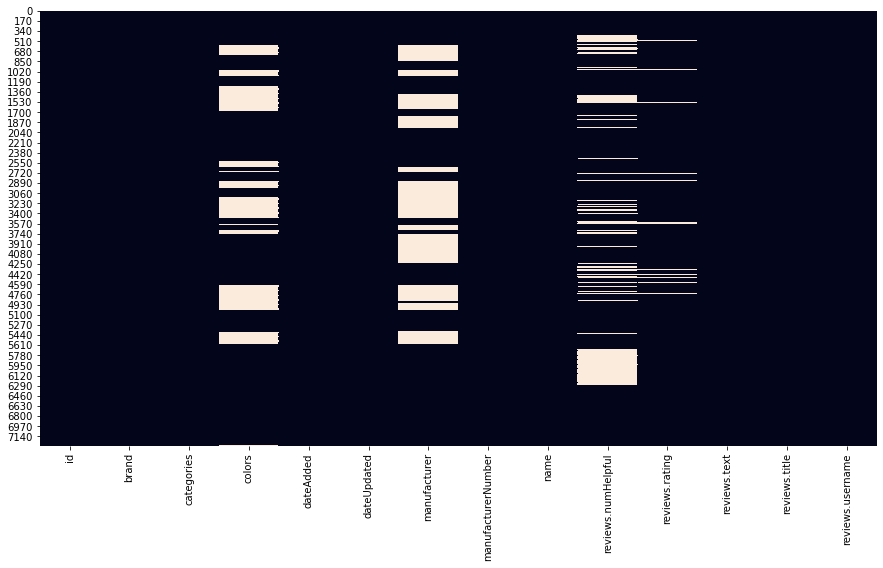

In [21]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

<a id='outliers'></a>
## 5. Checking Outliers

In [23]:
data_num = data.select_dtypes(include=np.number)

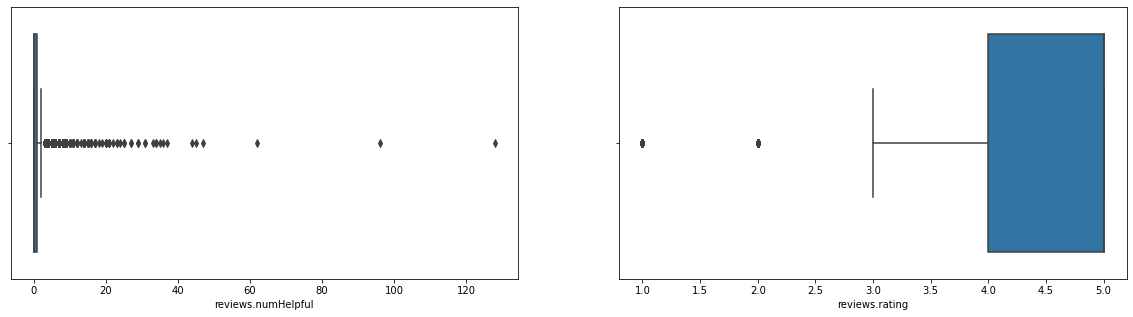

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,5))
for variable, subplot in zip(data_num.columns, ax.flatten()):
    sns.boxplot(data_num[variable], ax = subplot)
plt.show()

In [25]:
q1 = data.quantile(0.25) 
q3 = data.quantile(0.75) 
iqr = q3 - q1 

In [26]:
outlier = pd.DataFrame((data_num < (q1 - 1.5 * iqr)) | (data_num > (q3 + 1.5 * iqr)))
for i in outlier.columns:
    print(f'Total number of Outliers in column {i} are {len(outlier[outlier[i] == True][i])}')

Total number of Outliers in column reviews.numHelpful are 551
Total number of Outliers in column reviews.rating are 540


In [27]:
data = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)] 
data.reset_index(inplace=True)
data.drop('index',axis=1, inplace=True)

In [20]:
data.shape

(6243, 9)

### 5.1 Encoding <a id='Enc'></a>

In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['user_Id'] = lb.fit_transform(data['reviews.username'])

lb = LabelEncoder()
data['Product_Id'] = lb.fit_transform(data['id'])

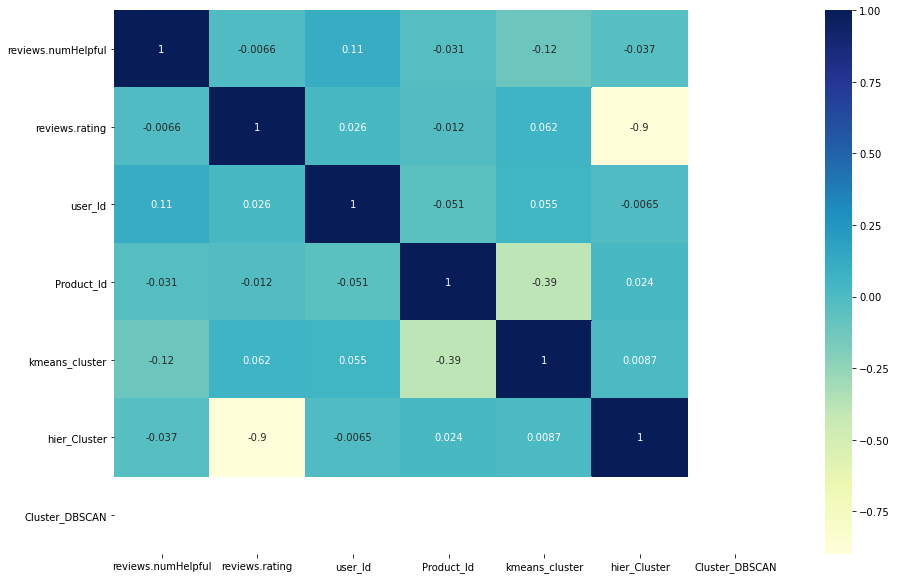

In [132]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")
plt.show()

In [23]:
data.head(1)

,id,brand,categories,name,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,user_Id,Product_Id
0,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft Surface Pro 4 Type Cover with Finger...,2.000000,5.000000,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,2099,12


In [24]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
data_trns = ss.fit_transform(data.select_dtypes(include=np.number))
data_scaled = pd.DataFrame(data_trns,columns=['reviews.numHelpful','reviews.rating','user_Id','Product_Id'])
data_scaled.head()

,reviews.numHelpful,reviews.rating,user_Id,Product_Id
0,1.000000,1.000000,0.376097,0.244898
1,1.000000,1.000000,0.839276,0.244898
2,0.500000,0.000000,0.029744,0.244898
3,0.500000,1.000000,0.850206,0.244898
4,1.000000,0.500000,0.892313,0.244898


<a id='C'></a>
## 6. Clustering

<a id='KMC'></a>
### 6.1 K-Means Clustering

In [25]:
k_data = data_scaled[['Product_Id','reviews.rating']]
k_data.head()

,Product_Id,reviews.rating
0,0.244898,1.000000
1,0.244898,1.000000
2,0.244898,0.000000
3,0.244898,1.000000
4,0.244898,0.500000


In [26]:
wcss = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i,  random_state=4)
    kmeans.fit(k_data)
    wcss.append(kmeans.inertia_)

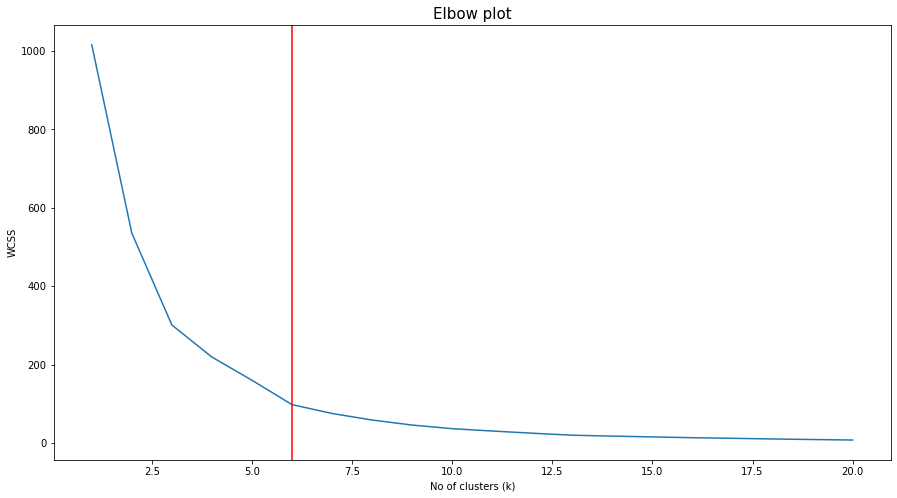

In [27]:
plt.plot(range(1,21), wcss)

plt.title('Elbow plot', fontsize=15)
plt.xlabel('No of clusters (k)', fontsize=10)
plt.ylabel('WCSS', fontsize=10)

plt.axvline(x = 6, color = 'red')
plt.show()

In [28]:
n_clusters  = [2, 3, 4, 5, 6]

for k in n_clusters:
    cluster = KMeans(n_clusters=k, random_state=4)
    predict = cluster.fit_predict(k_data)
    score = silhouette_score(k_data, predict, random_state=4)
    print(f"For {k} cluster the silhouette score is {score}")

For 2 cluster the silhouette score is 0.5120662061640083
For 3 cluster the silhouette score is 0.5332207807695257
For 4 cluster the silhouette score is 0.5688100932157828
For 5 cluster the silhouette score is 0.5763923182973204
For 6 cluster the silhouette score is 0.6028081839243844


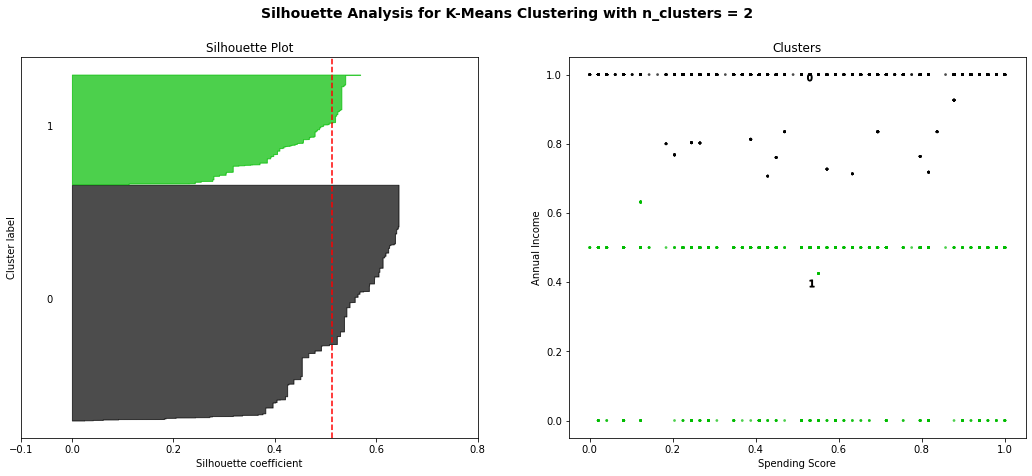

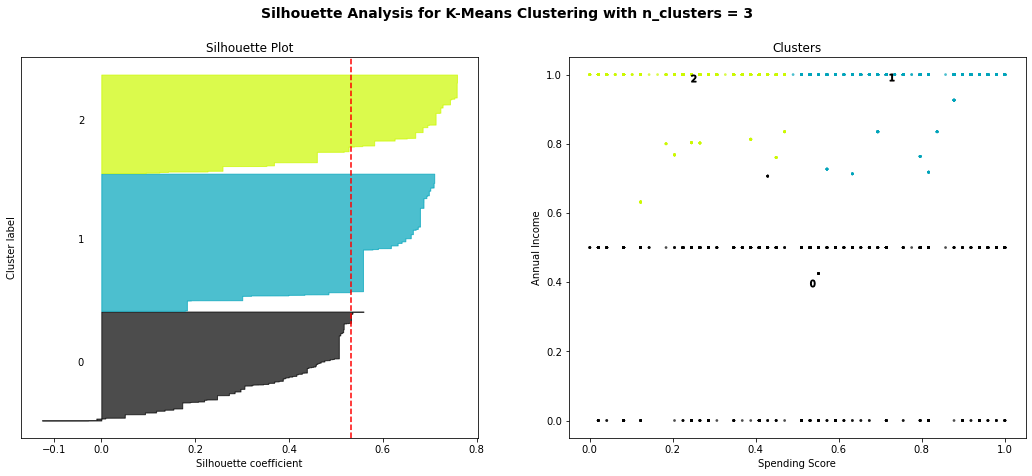

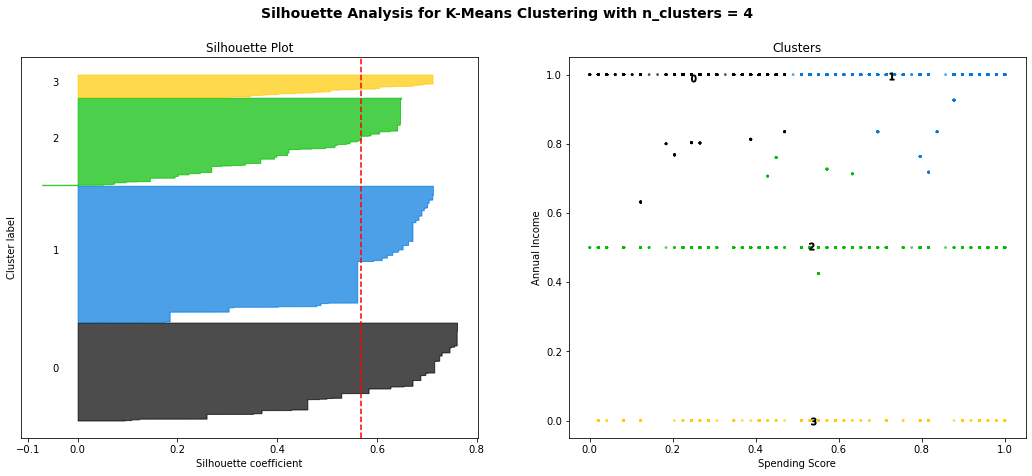

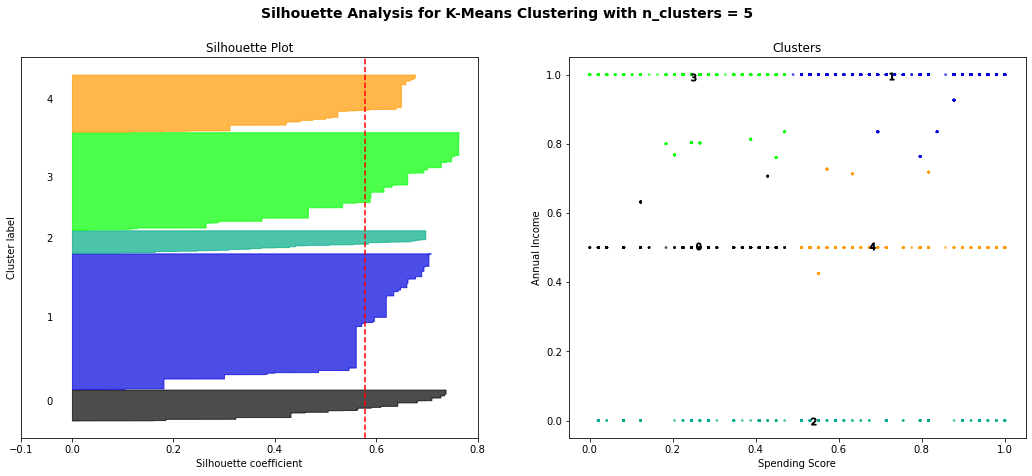

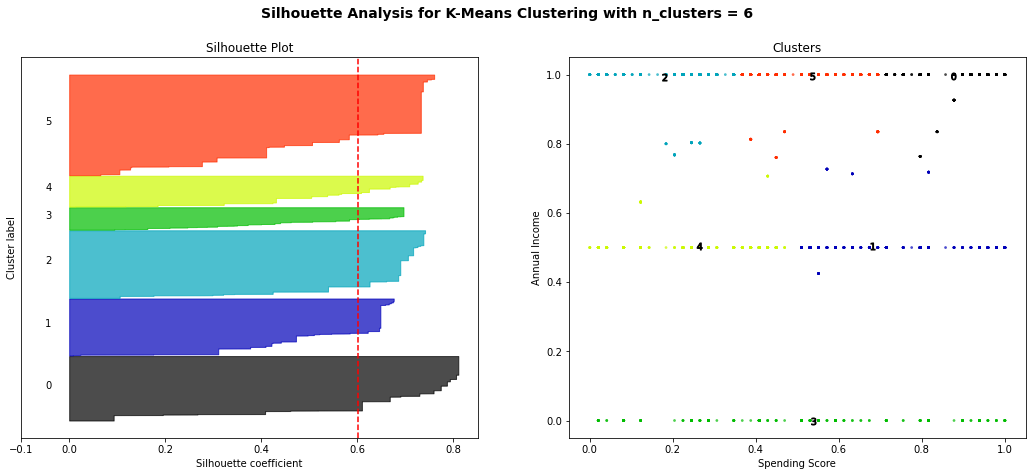

In [29]:
viz(k_data, [2, 3, 4, 5, 6])

In [30]:
k_cluster = KMeans(n_clusters=6, random_state=4)

k_cluster.fit(k_data)
data['kmeans_cluster'] = k_cluster.labels_

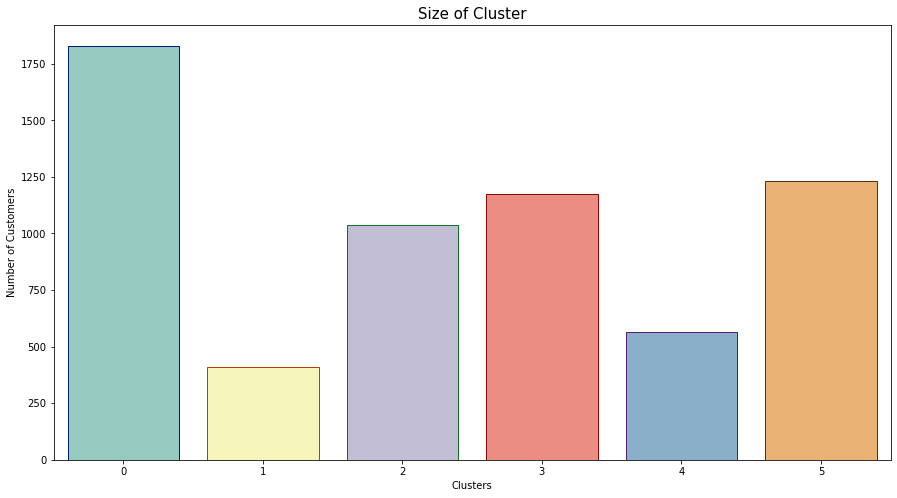

In [135]:
sns.countplot(data= data, x = 'kmeans_cluster',palette='Set3', edgecolor=sns.color_palette('dark',7))

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 10)
plt.ylabel('Number of Customers', fontsize = 10)

plt.show()

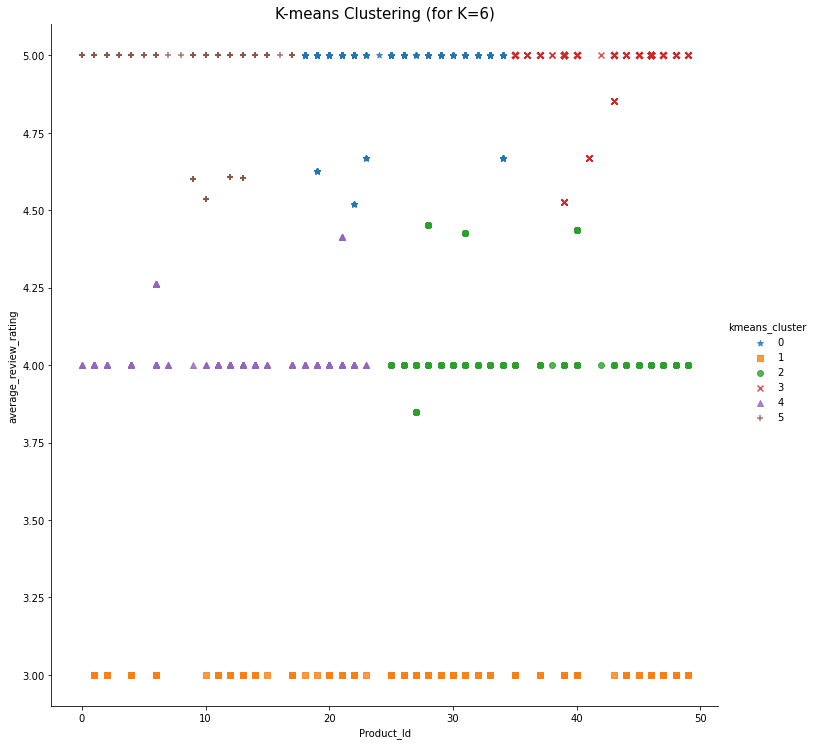

In [32]:
sns.lmplot(x = 'Product_Id', y = 'reviews.rating', data = data, hue = 'kmeans_cluster', 
                markers = ['*', ',','o','x','^','+'], fit_reg = False, size = 10)

plt.title('K-means Clustering (for K=6)', fontsize = 15)
plt.xlabel('Product_Id', fontsize = 10)
plt.ylabel('average_review_rating', fontsize = 10)

plt.show()

In [33]:
print(f'Size of cluster {data.kmeans_cluster.value_counts()[0]}')

data[data.kmeans_cluster == 0].describe().T

Size of cluster 1830


,count,mean,std,min,25%,50%,75%,max
reviews.numHelpful,1830.000000,0.562295,0.572945,0.000000,0.000000,1.000000,1.000000,2.000000
reviews.rating,1830.000000,4.990757,0.058219,4.520693,5.000000,5.000000,5.000000,5.000000
user_Id,1830.000000,2672.369399,1628.437817,4.000000,1224.000000,2647.000000,4058.750000,5579.000000
Product_Id,1830.000000,26.249180,4.497151,18.000000,22.000000,29.000000,29.000000,34.000000
kmeans_cluster,1830.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [34]:
data[data.kmeans_cluster == 0].describe(include='object').T

,count,unique,top,freq
id,1830,17,AVpgfP3DilAPnD_xtG3M,754
brand,1830,14,Logitech,754
categories,1830,17,"Electronics,Accessories & Supplies,Audio & Vid...",754
name,1830,17,Logitech 915-000224 Harmony Ultimate One 15-D...,754
reviews.text,1830,1800,Using this with a Sony BD player and Onkyo 5.1...,7
reviews.title,1830,1376,Five Stars,78
reviews.username,1830,1708,ByAmazon Customer,24


In [35]:
print(f'Size of cluster {data.kmeans_cluster.value_counts()[1]}')

data[data.kmeans_cluster == 1].describe().T

Size of cluster 409


,count,mean,std,min,25%,50%,75%,max
reviews.numHelpful,409.000000,0.432763,0.560989,0.000000,0.000000,0.000000,1.000000,2.000000
reviews.rating,409.000000,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000
user_Id,409.000000,2469.163814,1716.975352,6.000000,879.000000,2129.000000,4132.000000,5581.000000
Product_Id,409.000000,26.391198,11.419519,1.000000,20.000000,29.000000,29.000000,49.000000
kmeans_cluster,409.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
data[data.kmeans_cluster == 1].describe(include='object').T

,count,unique,top,freq
id,409,37,AVpgfP3DilAPnD_xtG3M,162
brand,409,29,Logitech,164
categories,409,37,"Electronics,Accessories & Supplies,Audio & Vid...",162
name,409,37,Logitech 915-000224 Harmony Ultimate One 15-D...,162
reviews.text,409,406,I purchased this camera so that I can watch my...,2
reviews.title,409,378,Three Stars,19
reviews.username,409,396,ByAmazon Customer,6


<a id='HC'></a>
### 6.2 Heirarchical Clustering 
**Agglomerative** (based on average_review_rating)

In [37]:
h_data = data_scaled[['Product_Id','reviews.rating']]
h_data.head()

,Product_Id,reviews.rating
0,0.244898,1.000000
1,0.244898,1.000000
2,0.244898,0.000000
3,0.244898,1.000000
4,0.244898,0.500000


In [38]:
link_mat = linkage(h_data, method='ward')
print(link_mat[0:10])

[[0.000e+00 1.000e+00 0.000e+00 2.000e+00]
 [3.000e+00 6.243e+03 0.000e+00 3.000e+00]
 [2.000e+00 2.100e+01 0.000e+00 2.000e+00]
 [7.000e+00 6.244e+03 0.000e+00 4.000e+00]
 [4.000e+00 5.000e+00 0.000e+00 2.000e+00]
 [6.000e+00 6.247e+03 0.000e+00 3.000e+00]
 [1.000e+01 6.248e+03 0.000e+00 4.000e+00]
 [8.000e+00 6.246e+03 0.000e+00 5.000e+00]
 [9.000e+00 6.250e+03 0.000e+00 6.000e+00]
 [1.200e+01 6.251e+03 0.000e+00 7.000e+00]]


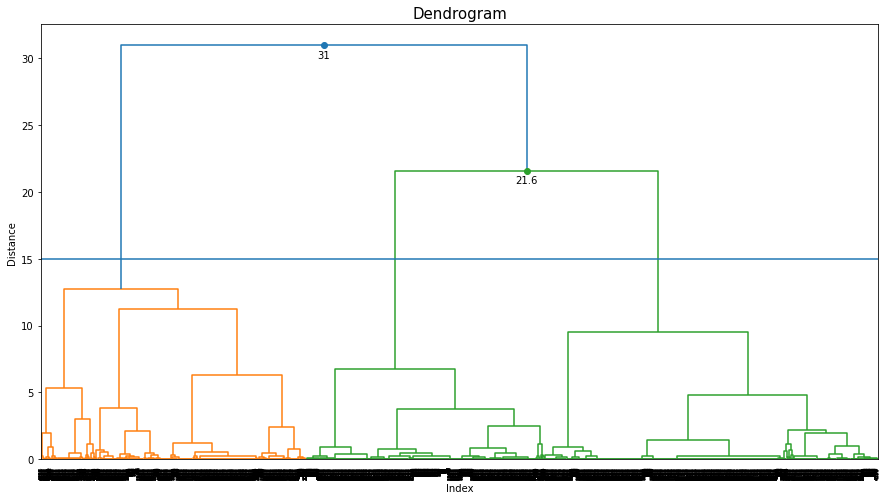

In [39]:
dendro = dendrogram(link_mat)

for i,d,c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3])/2
    y = d[1]   
    
    if y > 20:
        
        plt.plot(x, y, 'o', c=c)
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
        
plt.axhline(y = 15)
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 10)
plt.ylabel('Distance', fontsize = 10)
plt.show()

In [40]:
distance_ec = euclidean_distances(h_data)
dist_array = distance_ec(np.triu_indices(1000, k = 1))
coeff, cophenet_dist = cophenet(link_mat, dist_array)
print(coeff)

TypeError: 'numpy.ndarray' object is not callable

<a id='SSC'></a>
#### 6.2.1 Silhouette Score Method

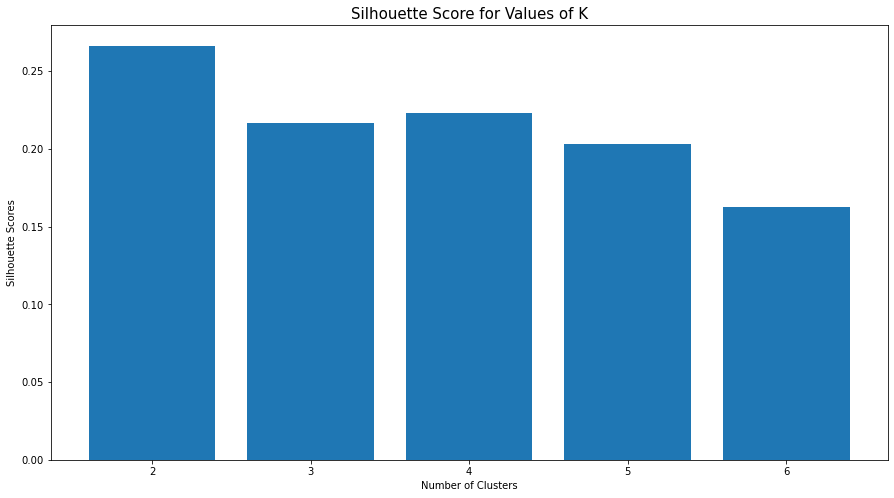

In [41]:
K = [2,3,4,5,6]
silhouette_scores = [] 

for i in K:
    model = AgglomerativeClustering(n_clusters = i) 
    silhouette_scores.append(silhouette_score(data_scaled, model.fit_predict(h_data))) 

plt.bar(K, silhouette_scores) 
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 10) 
plt.ylabel('Silhouette Scores', fontsize = 10)
plt.show()

In [42]:
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters.fit(data_scaled)

AgglomerativeClustering()

In [43]:
data['hier_Cluster'] = clusters.labels_

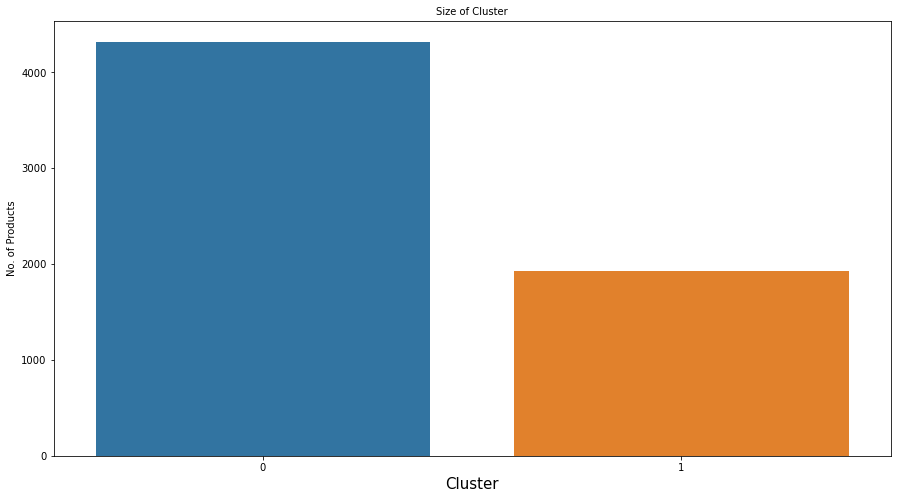

In [129]:
sns.countplot(data = data, x = 'hier_Cluster')

plt.title('Size of Cluster', fontsize = 10)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 10)

plt.show()

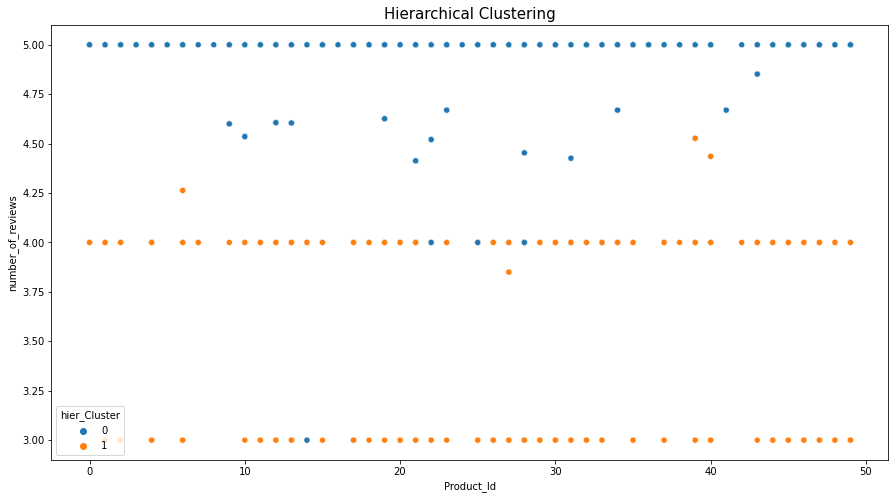

In [45]:
sns.scatterplot(x = 'Product_Id', y = 'reviews.rating', data = data, hue = 'hier_Cluster')

plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('Product_Id', fontsize = 10)
plt.ylabel('number_of_reviews', fontsize = 10)

plt.show()

<a id='CA1'></a>
#### 6.2.2 Analysis of Cluster 1

In [49]:
data['hier_Cluster'].value_counts()[0]

4320

In [50]:
data[data.hier_Cluster==0].describe()

,reviews.numHelpful,reviews.rating,user_Id,Product_Id,kmeans_cluster,hier_Cluster
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,0.473380,4.969969,2736.945139,25.698380,2.297222,0.000000
std,0.601561,0.162486,1586.606422,13.573806,2.118091,0.000000
min,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,1424.750000,13.000000,0.000000,0.000000
50%,0.000000,5.000000,2710.500000,29.000000,3.000000,0.000000
75%,1.000000,5.000000,4066.250000,35.000000,5.000000,0.000000
max,2.000000,5.000000,5580.000000,49.000000,5.000000,0.000000


In [51]:
data[data.hier_Cluster==0].describe(include = object)

,id,brand,categories,name,reviews.text,reviews.title,reviews.username
count,4320,4320,4320,4320,4320,4320,4320
unique,50,38,49,50,4259,3189,3913
top,AVpgfP3DilAPnD_xtG3M,Logitech,"Electronics,Accessories & Supplies,Audio & Vid...",Logitech 915-000224 Harmony Ultimate One 15-D...,Using this with a Sony BD player and Onkyo 5.1...,Five Stars,ByAmazon Customer
freq,758,835,758,758,7,133,36


**interpretation :**

<a id='CA2'></a>
#### 6.2.3 Analysis of Cluster 2

In [52]:
data['hier_Cluster'].value_counts()[1]

1923

In [54]:
data[data.hier_Cluster==1].describe()

,reviews.numHelpful,reviews.rating,user_Id,Product_Id,kmeans_cluster,hier_Cluster
count,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000
mean,0.427977,3.795554,2714.573063,26.392096,2.664587,1.000000
std,0.506346,0.409857,1631.149520,12.047564,1.089792,0.000000
min,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,1237.000000,20.000000,1.000000,1.000000
50%,0.000000,4.000000,2674.000000,29.000000,3.000000,1.000000
75%,1.000000,4.000000,4143.000000,31.000000,3.000000,1.000000
max,2.000000,4.526923,5581.000000,49.000000,4.000000,1.000000


In [55]:
data[data.hier_Cluster==1].describe(include = object)

,id,brand,categories,name,reviews.text,reviews.title,reviews.username
count,1923,1923,1923,1923,1923,1923,1923
unique,43,34,43,43,1909,1632,1813
top,AVpgfP3DilAPnD_xtG3M,Logitech,"Electronics,Accessories & Supplies,Audio & Vid...",Logitech 915-000224 Harmony Ultimate One 15-D...,Between the cats' tendency to treat the camera...,Four Stars,ByAmazon Customer
freq,573,583,573,573,4,34,11


**interpretation :**

<a id='DBSCAN'></a>
### 6.3 DBSCAN

In [158]:
model = DBSCAN(eps = 0.8, min_samples = 15)
model.fit(data_scaled)

DBSCAN(eps=0.8, min_samples=15)

In [159]:
(set(model.labels_))

{0}

In [160]:
data['Cluster_DBSCAN'] = model.labels_

In [161]:
data['Cluster_DBSCAN'].value_counts()

0    6243
Name: Cluster_DBSCAN, dtype: int64

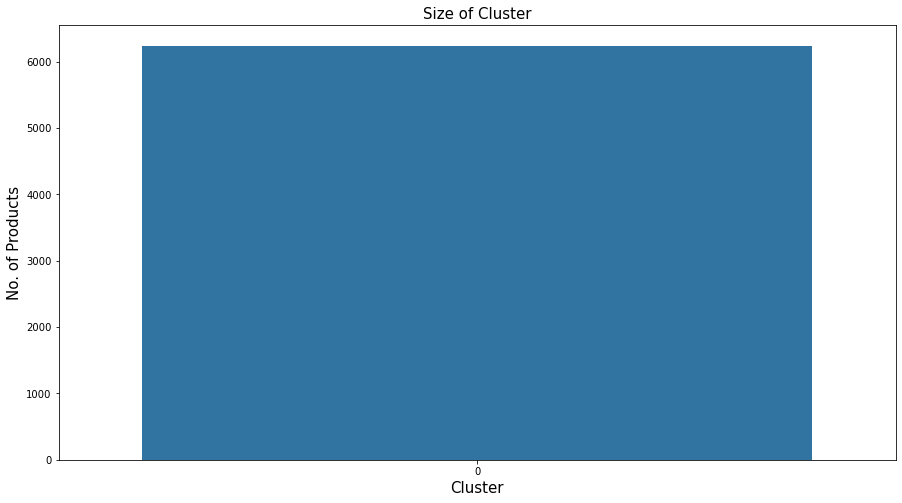

In [162]:
sns.countplot(data = data, x = 'Cluster_DBSCAN')

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)
plt.show()

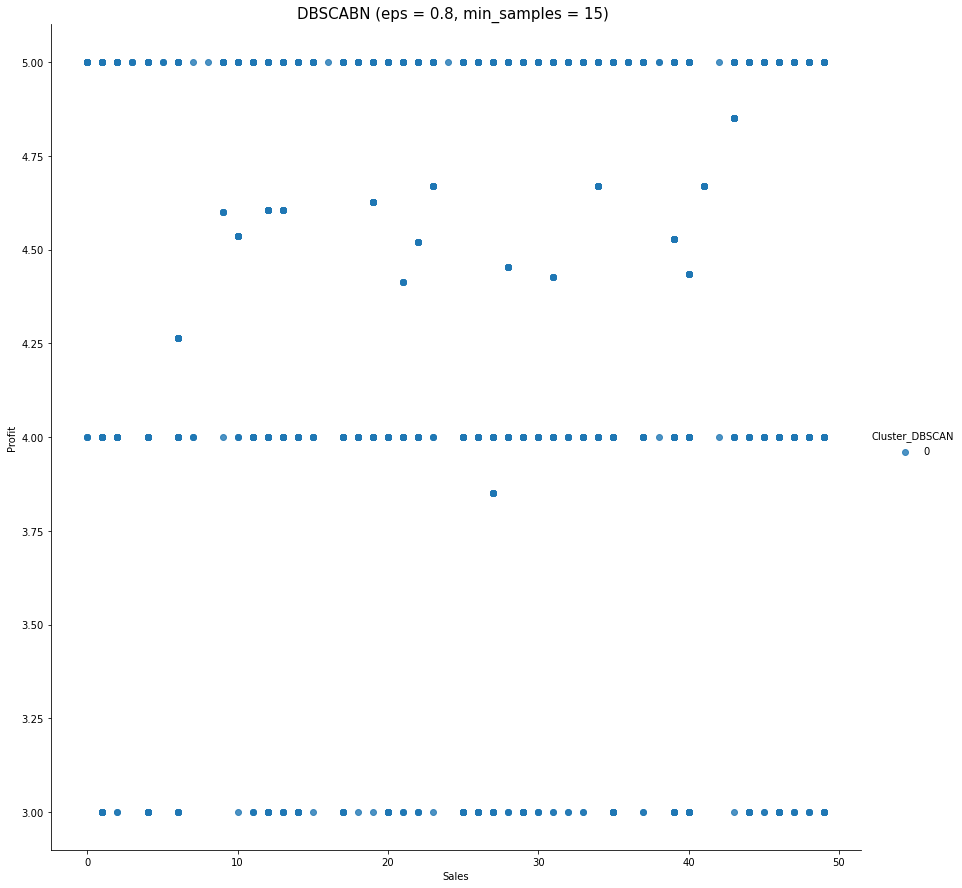

In [163]:
sns.lmplot(x = 'Product_Id', y = 'reviews.rating', data = data, hue = 'Cluster_DBSCAN', markers = ['o'], 
           fit_reg = False, size = 12)

plt.title('DBSCABN (eps = 0.8, min_samples = 15) ', fontsize = 15)
plt.xlabel('Sales', fontsize = 10)
plt.ylabel('Profit', fontsize = 10)

plt.show()

In [164]:
data[data.Cluster_DBSCAN==0]['name'].value_counts()

Logitech 915-000224  Harmony Ultimate One 15-Device Universal Infrared Remote with Customizable Touch Screen Control - Black         1331
Sony SRSXB30/BLK XB30 Portable Wireless Speaker with Bluetooth                                                                        462
Microsoft Surface Pro 4 Type Cover with Fingerprint ID                                                                                373
Everest Elite 700 Around-Ear Wireless Headphones (White)                                                                              299
Slingbox M2                                                                                                                           299
SAMSUNG 40'' Class FHD (1080P) Smart LED TV (UN40M5300)                                                                               295
Alpine - 6-1/2" 2-Way Coaxial Car Speakers with Polypropylene Cones (Pair) - Black                                                    246
PNY Anarchy 16GB Kit (2x8GB) DDR4 

In [59]:
data[data.Cluster_DBSCAN==-1]['name'].value_counts()

Series([], Name: name, dtype: int64)

<a id='BRS'></a>
## 7. Building Recommendation Systems 

<a id='PB'></a>
### 7.1 Popularity Based Recommendation

In [60]:
pd.DataFrame(data.groupby('name')['reviews.rating'].mean().sort_values(ascending=False))

,reviews.rating
name,
Toshiba Micro Component Speaker System: Wireless Bluetooth Speaker Sound System with FM,5.000000
Prime Three-Way Center Channel Speaker (Premium Black Ash),5.000000
Clarity - Super-Loud Phone Ringer - White,5.000000
"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",5.000000
"Kicker 41IK5BT2V2 Amphitheater High-Performance Audio System with Bluetooth, Black",5.000000
House of Marley EM-DH003-PS TTR Noise-Cancelling Over-Ear Headphones (Black),5.000000
"AW6500 All-Weather Outdoor Speaker (White, Single)",4.902646
Logitech G403 Wireless Gaming Mouse with High Performance Gaming Sensor,4.862069
Acoustimass 6 Series V Home Theater Speaker System (Black),4.833333


In [61]:
popularity_table=data.groupby('name').agg({'reviews.rating':'mean','reviews.numHelpful':'count'})

In [62]:
popularity_table['rating_per_count']=popularity_table['reviews.rating']/popularity_table['reviews.numHelpful']
popularity_table.sort_values('rating_per_count',ascending=False)

,reviews.rating,reviews.numHelpful,rating_per_count
name,,,
"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",5.000000,1,5.000000
Prime Three-Way Center Channel Speaker (Premium Black Ash),5.000000,1,5.000000
House of Marley EM-DH003-PS TTR Noise-Cancelling Over-Ear Headphones (Black),5.000000,1,5.000000
The Rebel BT On-Ear Wireless Bluetooth Headphones (Black),4.500000,2,2.250000
"Kicker 41IK5BT2V2 Amphitheater High-Performance Audio System with Bluetooth, Black",5.000000,3,1.666667
"Power Acoustik - Gothic Series 10"" Dual-Voice-Coil 2-Ohm Subwoofer - Black",4.666667,3,1.555556
Round LCD/Projector Ceiling Plate - Black,4.250000,4,1.062500
Toshiba Micro Component Speaker System: Wireless Bluetooth Speaker Sound System with FM,5.000000,5,1.000000
Clarity - Super-Loud Phone Ringer - White,5.000000,8,0.625000


In [63]:
top_popularity_table=popularity_table[popularity_table['rating_per_count']>1.0]
top_popularity_table

,reviews.rating,reviews.numHelpful,rating_per_count
name,,,
"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",5.000000,1,5.000000
House of Marley EM-DH003-PS TTR Noise-Cancelling Over-Ear Headphones (Black),5.000000,1,5.000000
"Kicker 41IK5BT2V2 Amphitheater High-Performance Audio System with Bluetooth, Black",5.000000,3,1.666667
"Power Acoustik - Gothic Series 10"" Dual-Voice-Coil 2-Ohm Subwoofer - Black",4.666667,3,1.555556
Prime Three-Way Center Channel Speaker (Premium Black Ash),5.000000,1,5.000000
Round LCD/Projector Ceiling Plate - Black,4.250000,4,1.062500
The Rebel BT On-Ear Wireless Bluetooth Headphones (Black),4.500000,2,2.250000


In [64]:
top_popularity_table.sort_values('reviews.rating',ascending=False).head()

,reviews.rating,reviews.numHelpful,rating_per_count
name,,,
"DreamWave - Tremor Portable Bluetooth Speaker - Green,Black",5.000000,1,5.000000
House of Marley EM-DH003-PS TTR Noise-Cancelling Over-Ear Headphones (Black),5.000000,1,5.000000
"Kicker 41IK5BT2V2 Amphitheater High-Performance Audio System with Bluetooth, Black",5.000000,3,1.666667
Prime Three-Way Center Channel Speaker (Premium Black Ash),5.000000,1,5.000000
"Power Acoustik - Gothic Series 10"" Dual-Voice-Coil 2-Ohm Subwoofer - Black",4.666667,3,1.555556


<a id='CB'></a>
### 7.2 Content Based Recommendation

In [65]:
categories=data['categories'].str.split(',',expand=True)
categories=categories.iloc[:,0:3]
categories.head()

,0,1,2
0,Electronics,Computers,Computer Accessories
1,Electronics,Computers,Computer Accessories
2,Electronics,Computers,Computer Accessories
3,Electronics,Computers,Computer Accessories
4,Electronics,Computers,Computer Accessories


In [66]:
categories.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [67]:
categories.columns=['category','sub_category_1','sub_category_2']
categories.head(2)

,category,sub_category_1,sub_category_2
0,Electronics,Computers,Computer Accessories
1,Electronics,Computers,Computer Accessories


In [68]:
data1=pd.concat([data,categories],axis=1)
data1.head()

,id,brand,categories,name,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,user_Id,Product_Id,kmeans_cluster,hier_Cluster,Cluster_DBSCAN,category,sub_category_1,sub_category_2
0,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft Surface Pro 4 Type Cover with Finger...,2.000000,5.000000,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,2099,12,5,0,0,Electronics,Computers,Computer Accessories
1,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft Surface Pro 4 Type Cover with Finger...,2.000000,5.000000,purchased to replace original surface pro 3 ke...,big improvement,gjohnsonxc,4684,12,5,0,0,Electronics,Computers,Computer Accessories
2,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft Surface Pro 4 Type Cover with Finger...,1.000000,3.000000,Good Keyboard and addition to the Surface Pro ...,Good Keyboard,Angie,166,12,1,1,0,Electronics,Computers,Computer Accessories
3,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft Surface Pro 4 Type Cover with Finger...,1.000000,5.000000,A must have accessory for the surface pro comp...,Must have,hooverlover,4745,12,5,0,0,Electronics,Computers,Computer Accessories
4,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft Surface Pro 4 Type Cover with Finger...,2.000000,4.000000,Fingerprint scanner for that price is not wort...,not worth the price,lundi3,4980,12,4,0,0,Electronics,Computers,Computer Accessories


In [69]:
data_feat=data1[['name','category','sub_category_1','sub_category_2','reviews.rating']]
data_feat.head()

,name,category,sub_category_1,sub_category_2,reviews.rating
0,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,Computers,Computer Accessories,5.000000
1,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,Computers,Computer Accessories,5.000000
2,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,Computers,Computer Accessories,3.000000
3,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,Computers,Computer Accessories,5.000000
4,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,Computers,Computer Accessories,4.000000


In [70]:
data_feat.shape

(6243, 5)

In [71]:
data_feat=data_feat.drop_duplicates()
data_feat.shape

(146, 5)

In [72]:
data_feat.index=data_feat['name']

In [73]:
data_feat=data_feat.drop('name',axis=1)
data_feat.head()

,category,sub_category_1,sub_category_2,reviews.rating
name,,,,
Microsoft Surface Pro 4 Type Cover with Fingerprint ID,Electronics,Computers,Computer Accessories,5.000000
Microsoft Surface Pro 4 Type Cover with Fingerprint ID,Electronics,Computers,Computer Accessories,3.000000
Microsoft Surface Pro 4 Type Cover with Fingerprint ID,Electronics,Computers,Computer Accessories,4.000000
Microsoft Surface Pro 4 Type Cover with Fingerprint ID,Electronics,Computers,Computer Accessories,4.606061
Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,Portable Audio & Video,Home Audio & Theater,5.000000


In [ ]:
data3=pd.get_dummies(data_feat)

In [ ]:
rec_model = NearestNeighbors(metric = 'cosine')
rec_model.fit(data3)

In [ ]:
query_product_index=12
dist, ind = rec_model.kneighbors(data3.iloc[query_product_index, :].values.reshape(1, -1), n_neighbors = 9)

In [ ]:
list(data3.index[ind[0]])[3:]

In [ ]:
for i in range(3, len(dist[0])):
    if i == 3:
        print('Top 5 Recommendations for the user who bought the product :\n',data3.index[query_product_index])
    else:
        print('\n', data3.index[ind[0][i]])

<a id='CF'></a>
### 7.3 Collaborative Filtering

In [83]:
reader = Reader(rating_scale=(1, 5))
data.head(1)

,id,brand,categories,name,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,user_Id,Product_Id,kmeans_cluster,hier_Cluster,Cluster_DBSCAN
0,AVpf3txeLJeJML43FN82,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Microsoft Surface Pro 4 Type Cover with Finger...,2.000000,5.000000,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,2099,12,5,0,0


In [84]:
rating_data = Dataset.load_from_df(data[['user_Id','Product_Id','reviews.rating']],reader)
[trainset, testset] = train_test_split(rating_data, test_size=.15,shuffle=True)

In [85]:
trainsetfull = rating_data.build_full_trainset()
print('Number of users: ', trainsetfull.n_users, '\n')
print('Number of items: ', trainsetfull.n_items, '\n')

Number of users:  5582 

Number of items:  50 



In [86]:
my_k = 15
my_min_k = 5
my_sim_option = {'name':'pearson', 'user_based':False}

In [87]:
algo = KNNWithMeans(k = my_k, min_k = my_min_k, sim_options = my_sim_option, verbose = True)

In [88]:
results = cross_validate(algo = algo, data = rating_data, measures=['RMSE'], cv=5, return_train_measures=True  )

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [89]:
print(results['test_rmse'].mean())

0.6016273021352226


In [90]:
alg=SVDpp()
alg.fit(trainsetfull)

In [91]:
algo.fit(trainsetfull)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [92]:
algo.predict(uid = 50, iid =2)

Prediction(uid=50, iid=2, r_ui=None, est=4.822429906542056, details={'actual_k': 0, 'was_impossible': False})

In [93]:
item_id=data['Product_Id'].unique()
item_id10=data.loc[data['user_Id']==10,'Product_Id']
item_id_pred=np.setdiff1d(item_id,item_id10)

In [94]:
item_id_pred

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [95]:
testset=[[50,iid,4] for iid in item_id_pred]
pred=alg.test(testset)
pred

[Prediction(uid=50, iid=0, r_ui=4, est=4.781933766737105, details={'was_impossible': False}),
 Prediction(uid=50, iid=1, r_ui=4, est=4.715515369759503, details={'was_impossible': False}),
 Prediction(uid=50, iid=2, r_ui=4, est=4.8309087825490735, details={'was_impossible': False}),
 Prediction(uid=50, iid=3, r_ui=4, est=4.952441761719348, details={'was_impossible': False}),
 Prediction(uid=50, iid=4, r_ui=4, est=4.732342008613257, details={'was_impossible': False}),
 Prediction(uid=50, iid=5, r_ui=4, est=4.781813264932011, details={'was_impossible': False}),
 Prediction(uid=50, iid=6, r_ui=4, est=4.650136854680233, details={'was_impossible': False}),
 Prediction(uid=50, iid=7, r_ui=4, est=4.624350921437724, details={'was_impossible': False}),
 Prediction(uid=50, iid=8, r_ui=4, est=4.6471931777230076, details={'was_impossible': False}),
 Prediction(uid=50, iid=9, r_ui=4, est=4.857731849469515, details={'was_impossible': False}),
 Prediction(uid=50, iid=10, r_ui=4, est=4.768082771897035,

In [96]:
pred_ratings=np.array([pred1.est for pred1 in pred])
i_max=pred_ratings.argmax()
iid=item_id_pred[i_max]
print("Top item for user 10 has iid {0} with predicted rating {1}".format(iid,pred_ratings[i_max]))

Top item for user 10 has iid 36 with predicted rating 4.9558931489140425


<a id='HR'></a>
### 7.4 Hybrid Recommendation System

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
ratings=data[['Product_Id','user_Id','reviews.rating']]

In [99]:
ratings=ratings.drop_duplicates(subset=['user_Id','Product_Id'])

In [100]:
ratings.head()

,Product_Id,user_Id,reviews.rating
0,12,2099,5.000000
1,12,4684,5.000000
2,12,166,3.000000
3,12,4745,5.000000
4,12,4980,4.000000


In [101]:
ratings['reviews.rating'].value_counts()

5.000000    3981
4.000000    1491
3.000000     391
4.669565      17
4.535714      11
4.263158      11
4.526923      10
4.851852       9
4.604478       8
4.606061       8
4.520693       8
4.625954       7
4.453333       7
4.426190       6
4.412903       5
4.435714       5
4.600000       5
3.850000       4
Name: reviews.rating, dtype: int64

In [102]:
products=data[['Product_Id','name','categories']]
products.head()

,Product_Id,name,categories
0,12,Microsoft Surface Pro 4 Type Cover with Finger...,"Electronics,Computers,Computer Accessories,Key..."
1,12,Microsoft Surface Pro 4 Type Cover with Finger...,"Electronics,Computers,Computer Accessories,Key..."
2,12,Microsoft Surface Pro 4 Type Cover with Finger...,"Electronics,Computers,Computer Accessories,Key..."
3,12,Microsoft Surface Pro 4 Type Cover with Finger...,"Electronics,Computers,Computer Accessories,Key..."
4,12,Microsoft Surface Pro 4 Type Cover with Finger...,"Electronics,Computers,Computer Accessories,Key..."


In [103]:
trainDF, tempDF = train_test_split(ratings, test_size=0.2, random_state=100)

In [104]:
tempDF.head()

,Product_Id,user_Id,reviews.rating
6161,29,5477,5.000000
4983,29,1033,3.000000
2538,47,2330,5.000000
303,12,4806,5.000000
2563,47,2175,5.000000


In [105]:
trainDF = trainDF.dropna()
trainDF.head()

,Product_Id,user_Id,reviews.rating
3501,46,189,4.000000
2318,17,1995,5.000000
4122,39,3472,4.526923
1557,11,2625,5.000000
5764,29,1992,5.000000


In [106]:
ratings = pd.concat([trainDF, tempDF]).reset_index()
ratings.head()

,index,Product_Id,user_Id,reviews.rating
0,3501,46,189,4.000000
1,2318,17,1995,5.000000
2,4122,39,3472,4.526923
3,1557,11,2625,5.000000
4,5764,29,1992,5.000000


In [107]:
ratings.drop_duplicates()

,index,Product_Id,user_Id,reviews.rating
0,3501,46,189,4.000000
1,2318,17,1995,5.000000
2,4122,39,3472,4.526923
3,1557,11,2625,5.000000
4,5764,29,1992,5.000000
...,...,...,...,...
5979,5570,29,180,5.000000
5980,5892,29,5467,5.000000
5981,2826,4,2087,4.000000
5982,1128,40,4935,3.000000


In [108]:
ratings2=ratings.pivot(index='Product_Id',columns='user_Id',values='reviews.rating').fillna(0)
ratings2.head()

user_Id,0,1,2,3,4,5,6,7,8,9,...,5572,5573,5574,5575,5576,5577,5578,5579,5580,5581
Product_Id,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [109]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=40,random_state=4)
svd.fit(ratings2)

TruncatedSVD(n_components=40, random_state=4)

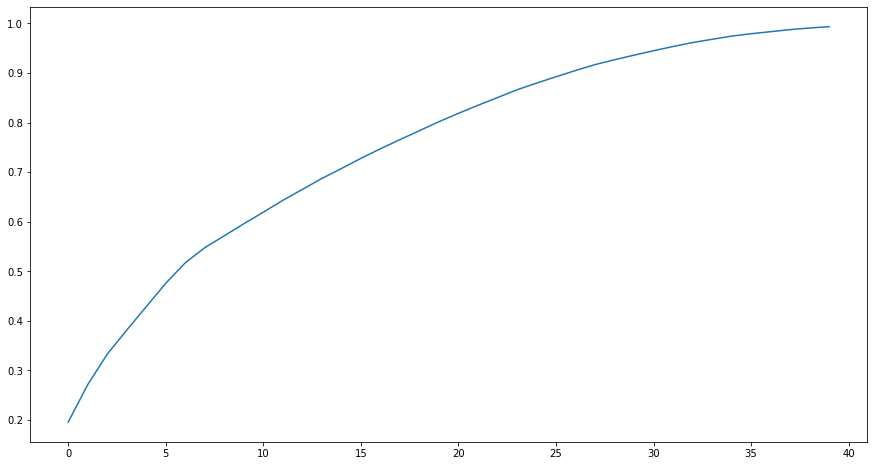

In [110]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.show()

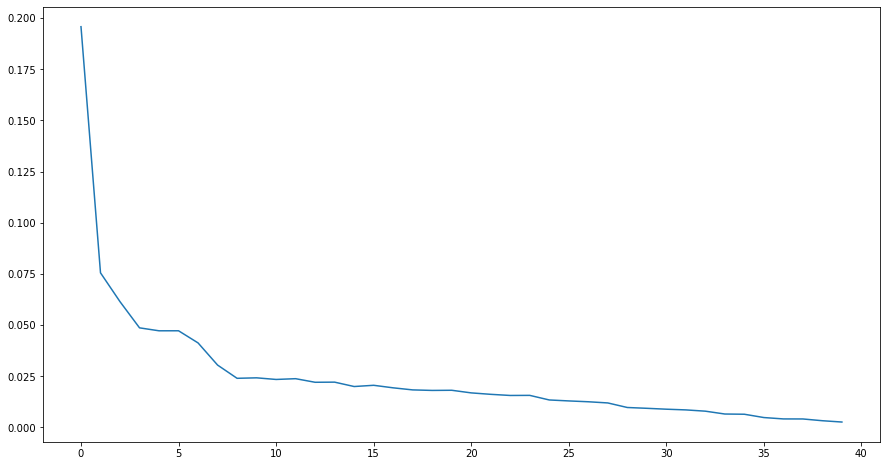

In [111]:
plt.plot((svd.explained_variance_ratio_))
plt.show()

In [112]:
ratings_svd=svd.fit_transform(ratings2)
ratings_svd.shape

(50, 40)

In [113]:
pid=ratings2.index

In [114]:
ratings_corr=np.corrcoef(ratings_svd)
ratings_corr=pd.DataFrame(ratings_corr,columns=pid,index=pid)
ratings_corr.head()

Product_Id,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Product_Id,,,,,,,,,,,,,,,,,,,,,
0,1.000000,-0.031776,-0.031603,-0.020244,-0.015201,-0.041346,-0.019706,-0.036426,0.013017,-0.028209,...,-0.045954,-0.050170,-0.025028,-0.024397,-0.025844,-0.045315,-0.017446,-0.034689,-0.048668,-0.027477
1,-0.031776,1.000000,-0.029667,-0.025336,-0.006936,-0.051351,-0.024421,-0.016466,-0.091013,-0.034959,...,-0.042399,-0.062940,-0.035436,-0.005037,-0.032028,-0.034587,-0.005710,-0.025302,-0.041211,0.001011
2,-0.031603,-0.029667,1.000000,-0.025953,-0.012291,-0.050993,-0.024288,0.033287,0.154531,-0.034768,...,-0.046594,-0.062910,0.129950,-0.019365,-0.031853,-0.032026,0.001240,-0.036243,-0.040944,-0.033866
3,-0.020244,-0.025336,-0.025953,1.000000,-0.012284,-0.056564,0.722353,0.254868,0.094393,-0.021742,...,-0.036491,-0.056300,0.427517,-0.019574,-0.020301,-0.037225,0.307367,-0.027995,-0.038917,-0.022134
4,-0.015201,-0.006936,-0.012291,-0.012284,1.000000,-0.024726,-0.004739,-0.140000,0.110832,-0.001169,...,-0.008731,-0.030047,-0.016629,-0.009203,-0.005722,-0.019546,0.009344,-0.001897,-0.028852,-0.004552


In [115]:
def prod_rec(pid):
    rec=ratings_corr[ratings_corr.index==pid].T
    rec=rec.rename(columns={pid:'corr'})
    rec=rec.sort_values(by='corr',ascending=False)
    return(rec)

In [116]:
prod_index=12
product=prod_rec(prod_index).head()


In [117]:
prod_r=product.reset_index()
prod_r=prod_r.rename(columns={prod_r.columns[0]:'prod_id'})
prod_r

Product_Id,prod_id,corr
0,12,1.000000
1,7,0.169670
2,38,0.037411
3,4,0.021877
4,13,0.021833


In [118]:
products=data[['Product_Id','brand','name']]
products.head()

,Product_Id,brand,name
0,12,Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...
1,12,Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...
2,12,Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...
3,12,Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...
4,12,Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...


In [119]:
products=products.drop_duplicates()

In [120]:
products.set_index('Product_Id',inplace=True)
products.head()

,brand,name
Product_Id,,
12,Microsoft,Microsoft Surface Pro 4 Type Cover with Finger...
28,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
35,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
49,Ultimate Ears,Ultimate Ears MEGABLAST Portable Wi-Fi/Bluetoo...
19,Lowepro,Flipside 300 Backpack (Black)


In [121]:
for i in range(0, 5):
    if i == 0:
        print('Top Recommendations for the user who bought the product :\n',products.loc[prod_index])
    else:
        x=prod_r['prod_id']
        y=x[i]
        print('\n',products.loc[y])

Top Recommendations for the user who bought the product :
 brand                                            Microsoft
name     Microsoft Surface Pro 4 Type Cover with Finger...
Name: 12, dtype: object

 brand                                  Peerless-AV
name     Round LCD/Projector Ceiling Plate - Black
Name: 7, dtype: object

 brand                                       Power Acoustik
name     Power Acoustik - Gothic Series 10" Dual-Voice-...
Name: 38, dtype: object

 brand                                              Samsung
name     SAMSUNG 40'' Class FHD (1080P) Smart LED TV (U...
Name: 4, dtype: object

 brand                                                  JVC
name     JVC KD-X320BTS Apple iPod and Android Digital ...
Name: 13, dtype: object
